In [7]:
import keras
import numpy as np
import tensorflow as tf
from keras import regularizers
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from keras import datasets, models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Conv2D

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [9]:
num_classes = 10

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=60, batch_size=64, validation_split = 0.1)

Epoch 1/60
704/704 [==============================] - 14s 14ms/step - loss: 1.7754 - accuracy: 0.3928 - val_loss: 1.2535 - val_accuracy: 0.5472
Epoch 2/60
704/704 [==============================] - 9s 13ms/step - loss: 1.2320 - accuracy: 0.5570 - val_loss: 0.9798 - val_accuracy: 0.6534
Epoch 3/60
704/704 [==============================] - 9s 13ms/step - loss: 1.0488 - accuracy: 0.6268 - val_loss: 0.9116 - val_accuracy: 0.6714
Epoch 4/60
704/704 [==============================] - 9s 13ms/step - loss: 0.9186 - accuracy: 0.6780 - val_loss: 0.8433 - val_accuracy: 0.7068
Epoch 5/60
704/704 [==============================] - 10s 14ms/step - loss: 0.8438 - accuracy: 0.7062 - val_loss: 0.7226 - val_accuracy: 0.7526
Epoch 6/60
704/704 [==============================] - 9s 13ms/step - loss: 0.7912 - accuracy: 0.7254 - val_loss: 0.7110 - val_accuracy: 0.7540
Epoch 7/60
704/704 [==============================] - 9s 13ms/step - loss: 0.7427 - accuracy: 0.7434 - val_loss: 0.6520 - val_accuracy: 0.77

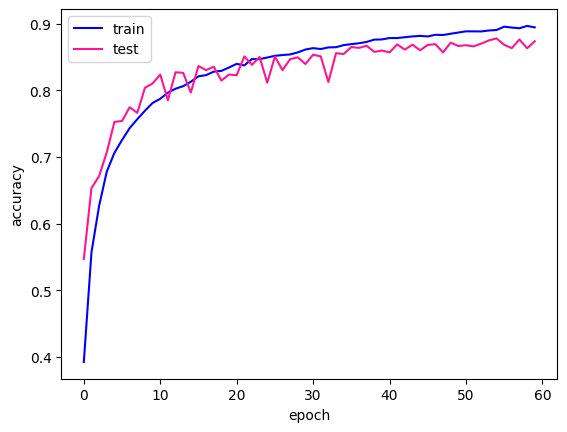

In [14]:
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='deeppink', label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.subplots_adjust(hspace=0.2)
plt.legend()

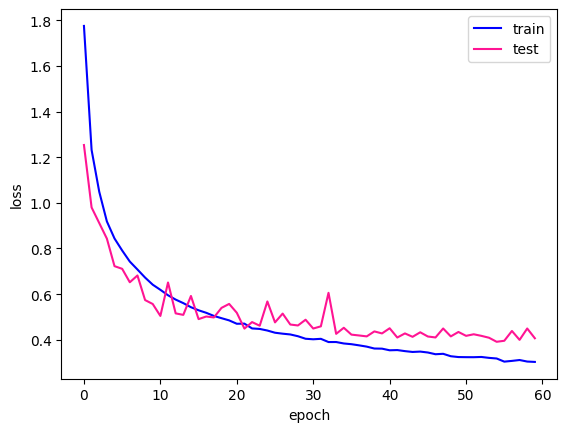

In [15]:
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='deeppink', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.4140 - accuracy: 0.8675

Test Accuracy: 0.8675000071525574
Test Loss:     0.4140259325504303
